《设定测试》读取当日时间格式：n1 2018-10-16
《设定测试》读取当日时间格式：n2 20181016
《设定测试》读取前二日时间格式：n3 2018-10-15
《设定测试》读取当日时间格式：n4 20181016
《设定测试》读取当日时间格式：n5 2018-10-16T19:20:48.617907
《设定测试》手动设定选股开始时间格式：n8 20180201
《设定测试》手动设定选股结束时间格式：n9 20180209
《设定测试》自动设定数据起始设定前推200天：n10 2018-03-30
《设定测试》设定股票代码 000001.XSHG
《数据测试》打印 开盘 最高 最低 收盘 成交量 6.3 6.35 6.15 6.17 1552829.0
《数据测试》当天涨幅 -0.006441223832528209
《数据测试》打印60日均线 7.642166666666666
《数据测试》判断收盘价是否大于60日均线 False
《数据测试》30日最高价 7.89
《数据测试》最近30日，收盘价 Close 大于60日均线的天数 0
《数据测试》10日均线上穿 False
《数据测试》最近10天收阳线的天数 2
《数据测试》最近60天K线实体的最高价 8.78
《数据测试》5日均线上穿10日均线 False
-0.4551999999999964


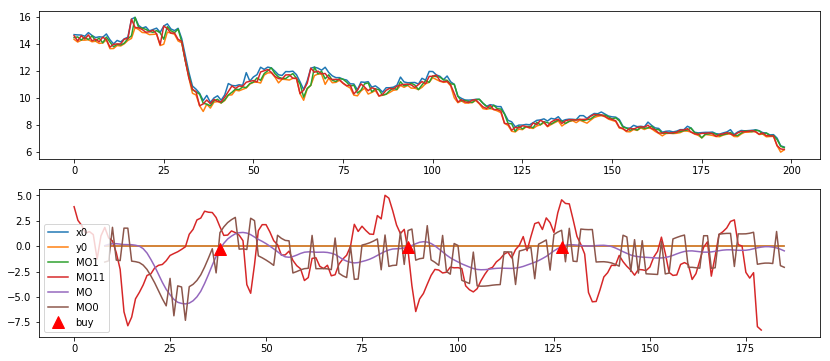

In [1]:

#925选股！

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)

from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库

import time
import datetime #读取/设定数据库时间区域，当前股票，选股时间段。 

n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前二天日期
print ("《设定测试》读取前二日时间格式：n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期

n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("《设定测试》读取当日时间格式：n4",n4) #当日时间格式：yyyymmdd

n5 = ("%s" % i.isoformat() )
print ("《设定测试》读取当日时间格式：n5",n5) #当日时间格式：yyyy-mm-dd:...

n8="20180201"#开始时间
print ("《设定测试》手动设定选股开始时间格式：n8",n8)

n9="20180209"#结束时间
print ("《设定测试》手动设定选股结束时间格式：n9",n9)

def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=200) 
    yesterday=today-oneday  
    return yesterday
n10 = (getYesterday())# 输出前200天日期
#n10="20170101"#设定起始时间
print ("《设定测试》自动设定数据起始设定前推200天：n10",n10)

x1="000001.XSHG" #用rqalpha本地数据需要代码后缀！！！！XSHE=深圳，XSHG=上海
print ("《设定测试》设定股票代码",x1)

x2="300334.XSHE"

from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"  #设定数据库连接：rqalpha   tushare
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)

S(x2)  # 设置当前关注股票
T(n3)   # 设置当前观察日期

print ("《数据测试》打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("《数据测试》当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("《数据测试》打印60日均线",MA(C, 60))  # 打印60日均线
print ("《数据测试》判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("《数据测试》30日最高价",HHV(H, 30))  # 30日最高价
print ("《数据测试》最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("《数据测试》10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("《数据测试》最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("《数据测试》最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("《数据测试》5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线

#CCI指标 方差函数模块


def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    return sum_/N

#TYP = ((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)

MO1 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),1))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),1)))
MO2 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),2))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),2)))
MO3 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),3))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),3)))
MO4 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),5))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),5)))
MO5 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),7))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),7)))
MO6 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),9))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),9)))
MO7 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),11))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),11)))
MO8 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),13))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),13)))
MO9 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),15))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),15)))
MO10 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),17))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),17)))
MO11 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),19))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),19)))
MO = (MA((MA(LOW-REF(HIGH,13),5)),5))  #*0.01 #(1-0.618)
MO0 = (MO1*MO2*MO3*MO4*MO5*MO6*MO7*MO8*MO9*MO10*MO11)
MO0=MO+MO2
x0=MO*0
y0=MO*0
#均线
f, (ax1,ax2) = plt.subplots(2,1)
#ax = plt.subplot()
ax1.plot(H.series, label="H")
ax1.plot(L.series, label="L")
ax1.plot(O.series, label="O")
ax1.plot(C.series, label="C")
ax2.plot(x0.series, label="x0")
ax2.plot(y0.series, label="y0")
ax2.plot(MO1.series, label="MO1")
#ax2.plot(MO2.series, label="MO2")
#ax2.plot(MO3.series, label="MO3")
#ax2.plot(MO4.series, label="MO4")
#ax2.plot(MO5.series, label="MO5")
#ax2.plot(MO6.series, label="MO6")
#ax2.plot(MO7.series, label="MO7")
#ax2.plot(MO8.series, label="MO8")
#ax2.plot(MO9.series, label="MO9")
#ax2.plot(MO10.series, label="MO10")
ax2.plot(MO11.series, label="MO11")
ax2.plot(MO.series, label="MO")
ax2.plot(MO0.series, label="MO0")
print (MO)
#ax2.set_xlim(0)
if1=( CROSS(MO5,1) and CROSS(MO6,1) and CROSS(MO7,1) and CROSS(MO8,1) and CROSS(MO9,1) and CROSS(MO10,1) and CROSS(MO11,1) )
if2=( CROSS(MO5,-1) and CROSS(MO6,-1) and CROSS(MO7,-1) and CROSS(MO8,-1) and CROSS(MO9,-1) and CROSS(MO10,-1) and CROSS(MO11,-1))
if3=( (REF(VOL,1)/REF(MA(VOL,3),2))>1.618 and REF(CLOSE,2)/REF(OPEN,1)<1.0618 and REF(CLOSE,2)/REF(CLOSE,1)<1.099 and OPEN/REF(CLOSE,1)<1.0618 )
#buy_signal = if1 and if2 and if3
buy_signal = CROSS(MO,0) 
sell_signal = CROSS(0,MO11)
#buy_signal =  ( CROSS(MO5,0) and CROSS(MO6,0) and CROSS(MO7,0) and CROSS(MO8,0) and CROSS(MO9,0) and CROSS(MO10,0) and CROSS(MO11,0) )
#buy_signal = ( CROSS(MO5,-1) and CROSS(MO6,-1) and CROSS(MO7,-1) and CROSS(MO8,-1) and CROSS(MO9,-1) and CROSS(MO10,-1) and CROSS(MO11,-1))
#buy_signal = ( CROSS((ATAN((REF(MA(CLOSE,12),1)/REF(MA(CLOSE,12),2)-1)*100)*75.3),35) and (REF(VOL,1)/REF(MA(VOL,3),2))>1.618 and REF(CLOSE,2)/REF(OPEN,1)<1.0618 and REF(CLOSE,2)/REF(CLOSE,1)<1.099 and OPEN/REF(CLOSE,1)<1.0618) 


#buy_signal = CROSS(CCI or VC,N1 or N2)
#sell_signal = CROSS(CCI+VC,N1+N2)
plt.plot(np.where(buy_signal.series)[0], MO.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
#plt.plot(np.where(sell_signal.series)[0], MO.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")


plt.legend(loc="best")
plt.show()






In [2]:


print ("《RQALPHA本地化开始选股》读取开始时间：==》n5",n5) 
# 选股CCI  OK!!!


select(
    lambda : CROSS((MA((MA(LOW-REF(HIGH,13),5)),5)),0) ,
    start_date=(n3), end_date=(n2),)

print ("《结束选股》读取结束时间：==》n5",n5) 




《RQALPHA本地化开始选股》读取开始时间：==》n5 2018-10-16T19:20:48.617907
lambda : CROSS((MA((MA(LOW-REF(HIGH,13),5)),5)),0) ,
[20181016]
No data for 000003.XSHE
No data for 000013.XSHE
No data for 000015.XSHE
No data for 000047.XSHE
No data for 000405.XSHE
No data for 000412.XSHE
No data for 000508.XSHE
No data for 000542.XSHE
No data for 000556.XSHE
No data for 000588.XSHE
No data for 000621.XSHE
No data for 000653.XSHE
No data for 000658.XSHE
No data for 000660.XSHE
No data for 000675.XSHE
No data for 000689.XSHE
No data for 000730.XSHE
No data for 002257.XSHE
No data for 002525.XSHE
No data for 002710.XSHE
No data for 002720.XSHE
No data for 002939.XSHE
No data for 002940.XSHE
No data for 300361.XSHE
No data for 300646.XSHE
No data for 300728.XSHE
No data for 300760.XSHE
No data for 600349.XSHG
No data for 600625.XSHG
No data for 600632.XSHG
No data for 600646.XSHG
No data for 600669.XSHG
No data for 600670.XSHG
No data for 600709.XSHG
No data for 600813.XSHG
No data for 600878.XSHG
No data for 6011

In [4]:
'''
//#@Fname=集合9点25
//#@comment=
//#@control=
//#@FuncType=条件选股\自定选股\高级选股\
//#@availperiod=2147430400
//#@param=
//#@isDrawCurve=0
//#@Fdesc=9:25选股法，集合竞价交易，盘中看。第二日参考。
//#@defaultperiod=16384
//#@@FUNCSPEC@=source
'''

MO1 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),1))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),1)))
MO2 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),2))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),2)))
MO3 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),3))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),3)))
MO4 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),5))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),5)))
MO5 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),7))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),7)))
MO6 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),9))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),9)))
MO7 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),11))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),11)))
MO8 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),13))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),13)))
MO9 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),15))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),15)))
MO10 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),17))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),17)))
MO11 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),19))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),19)))
MAMTM = ((MA((MA(CLOSE-REF(CLOSE,12),6)),6)))



select(
    lambda: ( (range(MO2,0,2) and range(MO3,0,3) and CROSS(MO5,0) and CROSS(MO6,0) and CROSS(MO7,0) and CROSS(MO8,0) and CROSS(MO9,0) and CROSS(MO10,0) and CROSS(MO11,0)) or (range(MO2,0,2) and range(MO3,0,3)  and CROSS(MO5,-1) and CROSS(MO6,-1) and CROSS(MO7,-1) and CROSS(MO8,-1) and CROSS(MO9,-1) and CROSS(MO10,-1) and CROSS(MO11,-1)))and CROSS((ATAN((REF(MA(CLOSE,12),1)/REF(MA(CLOSE,12),2)-1)*100)*75.3),35)and (REF(VOL,1)/REF(MA(VOL,3),2))>1.618and REF(CLOSE,2)/REF(OPEN,1)<1.0618and REF(CLOSE,2)/REF(CLOSE,1)<1.099and OPEN/REF(CLOSE,1)<1.0618, start_date=(n3), end_date=(n2),)




FormulaException: series size == 0

In [5]:
select(
    lambda : CROSS((V/L), ((MA(((V/H)+(V/L))/2,27))-STD((V/H),27)*1.618)) ,
    start_date=(n3), end_date=(n2),)

lambda : CROSS((V/L), ((MA(((V/H)+(V/L))/2,27))-STD((V/H),27)*1.618)) ,
[20181012]
20181012 002228.XSHE 合兴包装
20181012 002573.XSHE 清新环境
20181012 300187.XSHE 永清环保
20181012 600521.XSHG 华海药业



In [11]:
#SELECT
MO1 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),1))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),1)))
MO2 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),2))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),2)))
MO3 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),3))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),3)))
MO4 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),5))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),5)))
MO5 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),7))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),7)))
MO6 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),9))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),9)))
MO7 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),11))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),11)))
MO8 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),13))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),13)))
MO9 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),15))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),15)))
MO10 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),17))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),17)))
MO11 = ((((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),19))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14),19)))
MAMTM = ((MA((MA(CLOSE-REF(CLOSE,12),6)),6)))
select(
    lambda : 
((range(MO2,0,2) 
and range(MO3,0,3) 
and CROSS(MO5,0) 
and CROSS(MO6,0) 
and CROSS(MO7,0) 
and CROSS(MO8,0) 
and CROSS(MO9,0) 
and CROSS(MO10,0) 
and CROSS(MO11,0)) 
 
or (range(MO2,0,2) 
and RANGE(MO3,0,3)  
and CROSS(MO5,-1) 
and CROSS(MO6,-1) 
and CROSS(MO7,-1) 
and CROSS(MO8,-1) 
and CROSS(MO9,-1) 
and CROSS(MO10,-1) 
and CROSS(MO11,-1)))

and CROSS((ATAN((REF(MA(CLOSE,12),1)/REF(MA(CLOSE,12),2)-1)*100)*75.3),35)
and (REF(VOL,1)/REF(MA(VOL,3),2))>1.618
and REF(CLOSE,2)/REF(OPEN,1)<1.0618
and REF(CLOSE,2)/REF(CLOSE,1)<1.099
and OPEN/REF(CLOSE,1)<1.0618 ,
start_date=(20170214), end_date=(20180214),)

FormulaException: series size == 0

In [9]:

#CCI选股！

#from matplotlib import rcParams
#import matplotlib.pyplot as plt
#import numpy as np
#np.seterr(all='ignore')
#rcParams['figure.figsize'] = (14, 6)

from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库

#from pytdx import * #通达信数据更新模块到QUANTAXIS的mongoDB
#from jaqs import * #QunatOS的jaqs客户端在线。
#from abupy import * #ABUPY本地化，数据在线下载更新，数据在线下载在根目录abu下
#from quantaxis import * #加载QUANTAXIS数据库模块，首先需要开启mongoDB+web服务器，数据更新通过通达信服务器。
#from hikyuu import * #HIKYUU本地化，数据库在根目录的stock。通过通达信导入。

import time
import datetime #读取/设定数据库时间区域，当前股票，选股时间段。 

n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("《设定测试》读取当日时间格式：n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前二天日期
print ("《设定测试》读取前二日时间格式：n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期

n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("《设定测试》读取当日时间格式：n4",n4) #当日时间格式：yyyymmdd

n5 = ("%s" % i.isoformat() )
print ("《设定测试》读取当日时间格式：n5",n5) #当日时间格式：yyyy-mm-dd:...

n8="20180201"#开始时间
print ("《设定测试》手动设定选股开始时间格式：n8",n8)

n9="20180209"#结束时间
print ("《设定测试》手动设定选股结束时间格式：n9",n9)

def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=200) 
    yesterday=today-oneday  
    return yesterday
n10 = (getYesterday())# 输出前200天日期
#n10="20170101"#设定起始时间
print ("《设定测试》自动设定数据起始设定前推200天：n10",n10)

x1="000001.XSHG" #用rqalpha本地数据需要代码后缀！！！！XSHE=深圳，XSHG=上海
print ("《设定测试》设定股票代码",x1)

from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"  #设定数据库连接：rqalpha   tushare
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)

S(x1)  # 设置当前关注股票
T(n3)   # 设置当前观察日期

print ("《数据测试》打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("《数据测试》当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("《数据测试》打印60日均线",MA(C, 60))  # 打印60日均线
print ("《数据测试》判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("《数据测试》30日最高价",HHV(H, 30))  # 30日最高价
print ("《数据测试》最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("《数据测试》10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("《数据测试》最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("《数据测试》最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("《数据测试》5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线

#CCI指标 方差函数模块


def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    return sum_/N

print ("《RQALPHA本地化开始CCI选股》读取开始时间：==》n5",n5) 
# 选股CCI  OK!!!


select(
    lambda : CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) 
            or ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14)))),101 
            or -101),
    start_date=(n3), end_date=(n2),)

print ("《结束选股》读取结束时间：==》n5",n5) 

《设定测试》读取当日时间格式：n1 2018-10-13
《设定测试》读取当日时间格式：n2 20181013
《设定测试》读取前二日时间格式：n3 2018-10-12
《设定测试》读取当日时间格式：n4 20181013
《设定测试》读取当日时间格式：n5 2018-10-13T15:04:01.646284
《设定测试》手动设定选股开始时间格式：n8 20180201
《设定测试》手动设定选股结束时间格式：n9 20180209
《设定测试》自动设定数据起始设定前推200天：n10 2018-03-27
《设定测试》设定股票代码 000001.XSHG
《数据测试》打印 开盘 最高 最低 收盘 成交量 2574.04 2615.92 2536.67 2606.91 17008163500.0
《数据测试》当天涨幅 0.00907697429029275
《数据测试》打印60日均线 2755.0393333333336
《数据测试》判断收盘价是否大于60日均线 False
《数据测试》30日最高价 2827.34
《数据测试》最近30日，收盘价 Close 大于60日均线的天数 5
《数据测试》10日均线上穿 False
《数据测试》最近10天收阳线的天数 7
《数据测试》最近60天K线实体的最高价 2911.45
《数据测试》5日均线上穿10日均线 False
《RQALPHA本地化开始CCI选股》读取开始时间：==》n5 2018-10-13T15:04:01.646284
lambda : CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) 
            or ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(